In [1]:
import pandas as pd
import numpy as np

import tensorflow as tf

2025-01-29 21:54:46.510718: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-29 21:54:46.521002: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738175086.533109  217405 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738175086.536249  217405 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-29 21:54:46.548443: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
train_set = pd.read_csv('mitbih_train.csv', header=None)
train_set.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
from sklearn.preprocessing import MinMaxScaler

train_set_gan_class1 = pd.read_csv('synthetic_data_class_1.csv', header=0)
train_set_gan_class1.columns = train_set_gan_class1.columns.astype(int)
scaler = MinMaxScaler()
train_set_gan_class1.iloc[:, :-1] = scaler.fit_transform(train_set_gan_class1.iloc[:, :-1])
train_set_gan_class1.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.593592,0.489721,0.274225,0.240599,0.258782,0.336274,0.332413,0.386299,0.273284,0.471230,...,0.637962,0.614920,0.207992,0.502238,0.481848,0.437112,0.469205,0.611881,0.434254,1
1,0.553204,0.563331,0.325711,0.235157,0.211398,0.506532,0.267969,0.558764,0.574936,0.537542,...,0.699047,0.719946,0.260209,0.467118,0.451114,0.326548,0.439327,0.601415,0.466314,1
2,0.507321,0.361406,0.240526,0.145998,0.186049,0.258011,0.262029,0.484918,0.282556,0.448778,...,0.524613,0.712377,0.285211,0.269582,0.700436,0.423351,0.436678,0.607993,0.323170,1
3,0.671800,0.452117,0.157375,0.441563,0.465788,0.357967,0.298810,0.557048,0.371338,0.478367,...,0.531127,0.624546,0.317577,0.346669,0.385145,0.423446,0.459710,0.312485,0.502073,1
4,0.635979,0.574421,0.394645,0.283761,0.311609,0.537432,0.458957,0.598921,0.496162,0.513674,...,0.676519,0.481236,0.244214,0.457780,0.506707,0.289941,0.490941,0.561202,0.577663,1


In [4]:

train_set_gan_class3 = pd.read_csv('synthetic_data_class_3.csv', header=0)
train_set_gan_class3.columns = train_set_gan_class3.columns.astype(int)



train_set_gan_class3.iloc[:, :-1] = scaler.fit_transform(train_set_gan_class3.iloc[:, :-1])

train_set_gan_class3.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.348575,0.637372,0.792989,0.726989,0.691103,0.356152,0.408976,0.314693,0.302202,0.270595,...,0.432826,0.642808,0.265516,0.274602,0.609082,0.458736,0.499794,0.538271,0.538086,3
1,0.578035,0.388907,0.544296,0.589726,0.706218,0.620875,0.581962,0.448939,0.541780,0.454074,...,0.476311,0.566119,0.262688,0.468719,0.668689,0.606592,0.600529,0.512326,0.423512,3
2,0.477300,0.752390,0.852197,0.785504,0.736691,0.504265,0.497633,0.294399,0.260429,0.263932,...,0.398049,0.533744,0.664105,0.075583,0.714404,0.392325,0.650021,0.561045,0.726997,3
3,0.473921,0.584042,0.739466,0.758630,0.734483,0.498269,0.386903,0.293428,0.196209,0.196479,...,0.292920,0.450623,0.315769,0.622167,0.792520,0.606157,0.496815,0.477328,0.654373,3
4,0.455471,0.494307,0.664243,0.669431,0.742667,0.527757,0.385661,0.391945,0.407976,0.291651,...,0.398618,0.489219,0.321037,0.479327,0.539431,0.613053,0.426656,0.392027,0.746850,3


/tmp/ipykernel_217405/2195230808.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='n', data=df, palette=['lightpink', 'purple', 'cyan', 'yellow', 'lightgreen'])


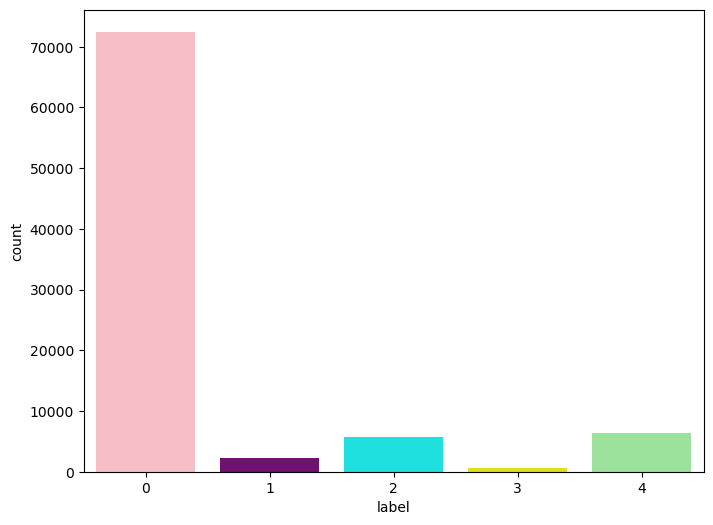

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

train_set_labels = train_set.copy().pop(187)
train_set_labels = train_set_labels.astype(int)
data = train_set_labels.copy()
df = pd.DataFrame(data)
df.columns = ['n']

plt.figure(figsize=(8, 6))
sns.countplot(x='n', data=df, palette=['lightpink', 'purple', 'cyan', 'yellow', 'lightgreen'])
plt.xlabel('label')
plt.ylabel('count')
plt.show()

In [6]:
train_set = pd.concat([train_set, train_set_gan_class1, train_set_gan_class3],ignore_index=True)
train_set.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
train_set_labels = train_set.pop(187)
train_set_labels = train_set_labels.astype(int)

train_set_labels.head()

0    0
1    0
2    0
3    0
4    0
Name: 187, dtype: int64

In [8]:
test_set = pd.read_csv('mitbih_test.csv', header=None)
test_set.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
test_set_labels = test_set.pop(187)
test_set_labels = test_set_labels.astype(int)

test_set_labels.head()

0    0
1    0
2    0
3    0
4    0
Name: 187, dtype: int64

In [10]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

# Check class distribution
print("Class distribution before preprocessing:", Counter(train_set_labels))

up_target_count = 5000 
down_target_count = 25000 


sampling_strategy1 = {label: up_target_count for label in set([1, 3])}
sampling_strategy2 = {label: down_target_count for label in set([0])}

# RandomUnderSampler will reduce the number of samples in the majority class
smote = SMOTE(sampling_strategy=sampling_strategy1, random_state=42)
under = RandomUnderSampler(sampling_strategy=sampling_strategy2, random_state=42)
pipeline = Pipeline([
    ('oversample', smote),
    ('undersample', under)
])
train_set, train_set_labels = pipeline.fit_resample(train_set, train_set_labels)

up_target_count = 1500 
down_target_count = 1500 


sampling_strategy1 = {label: up_target_count for label in set([1, 2, 3])}
sampling_strategy2 = {label: down_target_count for label in set([0, 4])}

# RandomUnderSampler will reduce the number of samples in the majority class
smote = SMOTE(sampling_strategy=sampling_strategy1, random_state=42)
under = RandomUnderSampler(sampling_strategy=sampling_strategy2, random_state=42)
pipeline = Pipeline([
    ('oversample', smote),
    ('undersample', under)
])
test_set, test_set_labels = pipeline.fit_resample(test_set, test_set_labels)

# Check class distribution after resampling
print("Class distribution after resampling:", Counter(train_set_labels))

Class distribution before preprocessing: Counter({0: 72471, 4: 6431, 2: 5788, 1: 4335, 3: 2561})
Class distribution after resampling: Counter({0: 25000, 4: 6431, 2: 5788, 1: 5000, 3: 5000})


/tmp/ipykernel_217405/3823188858.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='n', data=df, palette=['lightpink', 'purple', 'cyan', 'yellow', 'lightgreen'])


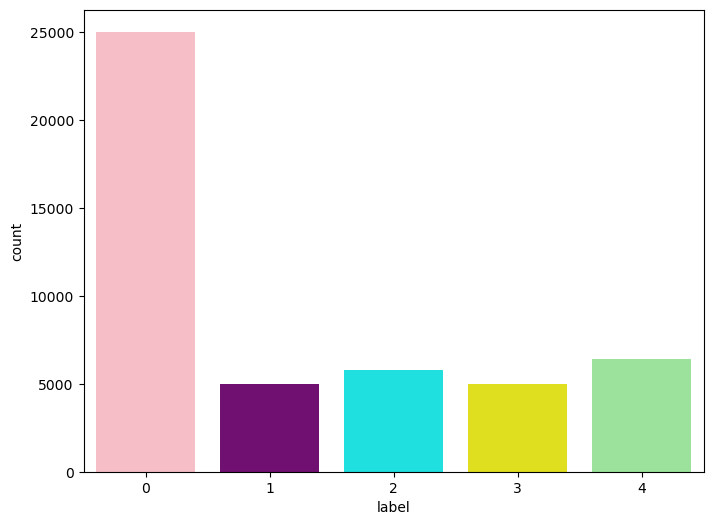

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = train_set_labels.copy()
df = pd.DataFrame(data)
df.columns = ['n']

plt.figure(figsize=(8, 6))
sns.countplot(x='n', data=df, palette=['lightpink', 'purple', 'cyan', 'yellow', 'lightgreen'])
plt.xlabel('label')
plt.ylabel('count')
plt.show()

In [12]:
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, MultiHeadAttention, Add, Conv1D, MaxPooling1D, Flatten, GlobalAveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras import layers, models


# Positional Encoding Layer
def positional_encoding(seq_len, d_model):
    pos = tf.range(seq_len, dtype=tf.float32)[:, tf.newaxis]  
    i = tf.range(d_model, dtype=tf.float32)[tf.newaxis, :]  
    angle_rates = 1 / tf.pow(10000.0, (2 * (i // 2)) / d_model)
    angle_rads = pos * angle_rates
    
    sin_part = tf.sin(angle_rads[:, 0::2])  
    cos_part = tf.cos(angle_rads[:, 1::2])  

    if d_model % 2 == 1:
        cos_part = tf.pad(cos_part, [[0, 0], [0, 1]])

    angle_rads = tf.concat([sin_part, cos_part], axis=-1)

    return tf.expand_dims(angle_rads, axis=0) 

# Transformer Encoder Block
def transformer_encoder(inputs, d_model, num_heads, ff_dim, dropout_rate):
    # Multi-Head Attention
    attention = MultiHeadAttention(num_heads=num_heads, key_dim=d_model)(inputs, inputs)
    attention = Dropout(dropout_rate)(attention)
    attention = Add()([attention, inputs])
    attention = LayerNormalization(epsilon=1e-6)(attention)
    
    # Feed-Forward Network
    ffn = Dense(ff_dim, activation="relu")(attention)
    ffn = Dense(d_model)(ffn)
    ffn = Dropout(dropout_rate)(ffn)
    ffn_output = Add()([ffn, attention])
    ffn_output = LayerNormalization(epsilon=1e-6)(ffn_output)
    
    return ffn_output

In [13]:
def build_transformer_model(seq_len, num_features, d_model, num_heads, ff_dim, num_layers, num_classes, dropout_rate):
    inputs = Input(shape=(seq_len, num_features))
    
    # CNN Feature Extractor
    x = Conv1D(filters=32, kernel_size=5, activation="relu", padding="same")(inputs)
    x = MaxPooling1D(pool_size=2)(x)
    x = Conv1D(filters=64, kernel_size=3, activation="relu", padding="same")(x)
    x = MaxPooling1D(pool_size=2)(x)

    # Adjust feature size for Transformer
    x = Dense(d_model)(x)
    
    # Add Positional Encoding
    pos_encoding = positional_encoding(seq_len // 4, d_model)  # After 2 MaxPooling layers
    x = x + pos_encoding[:, :, :]
    
    # Transformer Encoder Blocks
    for _ in range(num_layers):
        x = transformer_encoder(x, d_model, num_heads, ff_dim, dropout_rate)
    
    # Global Average Pooling and Output
    x = GlobalAveragePooling1D()(x)

    x = Dropout(dropout_rate)(x)
    outputs = Dense(num_classes, activation="softmax")(x)
    
    return Model(inputs, outputs)

In [14]:
# Model Parameters
SEQ_LEN = 187  # Length of each signal
NUM_FEATURES = 1  # Number of features in each time step
D_MODEL = 64  # Embedding dimension
NUM_HEADS = 4  # Number of attention heads
FF_DIM = 128  # Hidden layer size in feed-forward network
NUM_LAYERS = 5  # Number of transformer encoder blocks
NUM_CLASSES = 5  # Number of output classes (e.g., 5 heart conditions)
DROPOUT_RATE = 0.1  # Dropout rate

# Build the model
model = build_transformer_model(
    seq_len=SEQ_LEN,
    num_features=NUM_FEATURES,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    ff_dim=FF_DIM,
    num_layers=NUM_LAYERS,
    num_classes=NUM_CLASSES,
    dropout_rate=DROPOUT_RATE,
)

model.summary()

# Compile the model
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",  
    metrics=["accuracy"]
)

# Train the model
model.fit(train_set, train_set_labels, batch_size=64, epochs=20, validation_data=(test_set, test_set_labels))

I0000 00:00:1738175091.942131  217405 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6140 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3070 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 187, 1)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 187, 32)   │        192 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d       │ (None, 93, 32)    │          0 │ conv1d[0][0]      │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 93, 64)    │      6,208 │ max_pooling1d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_1     │ (None, 46, 64)    │          0 │ conv1d_1[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 46, 64)    │      4,160 │ max_pooling1d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 46, 64)    │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 46, 64)    │     66,368 │ add[0][0],        │
│ (MultiHeadAttentio… │                   │            │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 46, 64)    │          0 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 46, 64)    │          0 │ dropout_1[0][0],  │
│                     │                   │            │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 46, 64)    │        128 │ add_1[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 46, 128)   │      8,320 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 46, 64)    │      8,256 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 46, 64)    │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 46, 64)    │          0 │ dropout_2[0][0],  │
│                     │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 46, 64)    │        128 │ add_2[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 46, 64)    │     66,368 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 46, 64)    │          0 │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 46, 64)    │          0 │ dropout_4[0][0],  │
│                     │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 46, 64)    │        128 │ add_3[0][0]     

 Total params: 426,885 (1.63 MB)

 Trainable params: 426,885 (1.63 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20


I0000 00:00:1738175098.754667  217533 service.cc:148] XLA service 0x7e12fc0641a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1738175098.754720  217533 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Laptop GPU, Compute Capability 8.6
2025-01-29 21:54:58.970692: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1738175099.852318  217533 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-01-29 21:55:01.833836: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_8', 24 bytes spill stores, 24 bytes spill loads

2025-01-29 21:55:02.030539: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_139', 1

 19/738 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.3559 - loss: 1.9010  

I0000 00:00:1738175110.348230  217533 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


732/738 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6893 - loss: 0.8893

2025-01-29 21:55:19.761670: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_139', 136 bytes spill stores, 136 bytes spill loads

2025-01-29 21:55:19.768339: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_139', 56 bytes spill stores, 56 bytes spill loads

2025-01-29 21:55:19.977777: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_41', 48 bytes spill stores, 48 bytes spill loads

2025-01-29 21:55:20.041082: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_8', 12 bytes spill stores, 12 bytes spill loads

2025-01-29 21:55:20.746771: I external/local_xla/xla/stream_execu

738/738 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.6904 - loss: 0.8864

2025-01-29 21:55:34.855459: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_8', 12 bytes spill stores, 12 bytes spill loads

2025-01-29 21:55:34.931898: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_42', 136 bytes spill stores, 136 bytes spill loads

2025-01-29 21:55:35.316946: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_8', 32 bytes spill stores, 32 bytes spill loads

2025-01-29 21:55:35.427043: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_42', 56 bytes spill stores, 56 bytes spill loads



738/738 ━━━━━━━━━━━━━━━━━━━━ 43s 35ms/step - accuracy: 0.6906 - loss: 0.8859 - val_accuracy: 0.7595 - val_loss: 0.7563
Epoch 2/20
738/738 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9203 - loss: 0.2587 - val_accuracy: 0.8259 - val_loss: 0.5311
Epoch 3/20
738/738 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9357 - loss: 0.2105 - val_accuracy: 0.8208 - val_loss: 0.6145
Epoch 4/20
738/738 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9422 - loss: 0.1934 - val_accuracy: 0.8489 - val_loss: 0.5605
Epoch 5/20
738/738 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9450 - loss: 0.1870 - val_accuracy: 0.8701 - val_loss: 0.4075
Epoch 6/20
738/738 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9479 - loss: 0.1686 - val_accuracy: 0.8439 - val_loss: 0.5110
Epoch 7/20
738/738 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9491 - loss: 0.1684 - val_accuracy: 0.8831 - val_loss: 0.4003
Epoch 8/20
738/738 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9532 - loss: 0.1494 - val_accuracy: 0.8709 -

In [15]:
model.save('dataset1.keras')

2025-01-29 21:58:06.796624: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_42', 56 bytes spill stores, 56 bytes spill loads

2025-01-29 21:58:07.048885: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_42', 136 bytes spill stores, 136 bytes spill loads

2025-01-29 21:58:07.567339: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_8', 32 bytes spill stores, 32 bytes spill loads



235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step


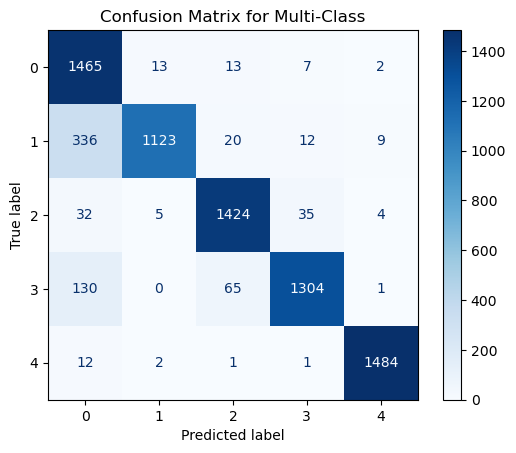

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(test_set_labels, [np.argmax(i) for i in model.predict(test_set)])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(test_set_labels))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Multi-Class")
plt.show()


In [18]:
from sklearn.metrics import precision_score, recall_score

precision = precision_score(test_set_labels, [np.argmax(i) for i in model.predict(test_set)], average='macro')

recall = recall_score(test_set_labels, [np.argmax(i) for i in model.predict(test_set)], average='macro')

print(f'Precision: {precision}')
print(f'Recall: {recall}')

235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Precision: 0.9216266909907807
Recall: 0.9066666666666668
